In [382]:
#Presented by

#Student name:ALON BUCHSHTAB
#Student id:313222978
#Student name:SHMUEL AZRAD
#Student id:315549022

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

import time
from selenium import webdriver

#driver = webdriver.Firefox('C:\\')  # Optional argument, if not specified will search path.
#driver = webdriver.Firefox()
driver = webdriver.Firefox()


In [383]:
driver.get('https://gudecks.com/meta/matchups?timeFrame=30&view=gods');

In [384]:


statarr=[]

#url="https://gudecks.com/meta/matchups?timeFrame=30&view=gods"
content = driver.page_source
soup = bs(content)
soup
#Getting infromation from Url
soup=bs(content,'html.parser')


#for line in Range(0,5):
boxval = soup.find_all('td',attrs={'class':"matchup-box"})
#Getting stats of win rates into matrix
for i in range(0,42):
    statarr.append(boxval[i].get_text())
StatMat = np.mat(statarr)   
StatMat=StatMat.reshape(6,7)


#Getting row names
GodName = soup.find_all('div',attrs={'class':"matchup-archetype-name"})

GNameL=[]
for i,Name in enumerate(GodName):
    GNameL.append(GodName[i].get_text())
GNameL

#Getting col names
ColName = soup.find_all('div',attrs={'class':"matchup-archetype-name-top"})
ColName[0].get_text()
CNameL=[]
for i,Name in enumerate(GodName):
    CNameL.append(GodName[i].get_text())
CNameL.append("ALL-GODS")
CNameL

#Build dataframe
print("God vs gods win_rate")
GvGdf = pd.DataFrame(StatMat, columns=CNameL, index=GNameL)
GvGdf.max
s=[]

#Points of interest
#GvGdf.describe()

#Colecting data for later use
maxwin=0
maxigods=0
for i,r in enumerate(statarr):
    if((i%8)!=0):
        s.append(statarr[i].replace('%',''))
        if(float(s[i])>float(maxwin)):
            maxwin=s[i]
            maxigods=i
    else:
        s.append('50')
        if(float(s[i])>float(maxwin)):
            maxwin=s[i]
            maxigods=i
        
minwin=100-float(maxwin)
GvGdf

God vs gods win_rate


,Light,Nature,War,Death,Magic,Deception,ALL-GODS
Light,,50.5%,49.6%,50.5%,57.6%,53.9%,51.7%
Nature,49.5%,,51.6%,52.7%,52.7%,55.9%,51.6%
War,50.4%,48.4%,,49.7%,51.4%,55.4%,50.5%
Death,49.5%,47.3%,50.3%,,52.9%,50.2%,49.7%
Magic,42.4%,47.3%,48.6%,47.1%,,54.6%,48.0%
Deception,46.1%,44.1%,44.6%,49.8%,45.4%,,46.2%


In [385]:
driver.get('https://gudecks.com/meta/matchups?timeFrame=30');

In [386]:

statarr2=[]

#url="https://gudecks.com/meta/matchups?timeFrame=30"
content = driver.page_source
soup = bs(content)
soup
#Getting infromation from Url
soup=bs(content,'html.parser')
boxval = soup.find_all('td',attrs={'class':"matchup-box"})
boxval
#Getting row names
ArchName = soup.find_all('div',attrs={'class':"matchup-archetype-name"})

GNameL=[]
for i,Name in enumerate(ArchName):
    GNameL.append(ArchName[i].get_text())
GNameL

#Getting col names
ColName = soup.find_all('div',attrs={'class':"matchup-archetype-name-top"})
ColName[0].get_text()
CNameL=[]
for i,Name in enumerate(ArchName):
    CNameL.append(ArchName[i].get_text())
CNameL.append("ALL-TYPES")
CNameL

#Getting stats of win rates into matrix
Number = (len(CNameL))*len(GNameL)
Number
for i in range(0,Number):
    statarr2.append(boxval[i].get_text())
StatMat2 = np.mat(statarr2)   
StatMat2=StatMat2.reshape(len(GNameL),len(CNameL))



#Build dataframe
print("Archtype vs Archtype win_rate")
ATvATdf = pd.DataFrame(StatMat2, columns=CNameL, index=GNameL)
#print(ATvATdf)
#ATvATdf.describe()

#Colecting data for later use
s2=[]
maxwinAT=0
maxiAT=0
for i,r in enumerate(statarr2):
    if(r!=''):
        s2.append(r.replace('%',''))
    else:
        s2.append('50.0') #Avarge~
    if(float(s2[i])>float(maxwinAT)):
        maxwinAT=s2[i]
        maxiAT=i
minwinAT=100-float(maxwinAT)
ATvATdf

Archtype vs Archtype win_rate


,Relic Zoo War,Deadly Control War,Zoo Death,Amazon Nature,Spell Nature,Board Wipe Death,Olympian War,Face Spell Magic,Atlantean Deception,Confused Nature,...,Chosen One Light,Other Nature,Hand Crush Deception,Olympian Light,Afterlife Death,Other Magic,Other Death,Other War,Other Deception,ALL-TYPES
Relic Zoo War,,53.4%,57.1%,50.5%,48.7%,53.0%,50.0%,65.1%,57.9%,58.6%,...,80.0%,63.5%,73.3%,60.0%,63.6%,66.5%,66.8%,65.2%,75.4%,59.3%
Deadly Control War,46.6%,,43.6%,56.2%,59.7%,52.2%,25.0%,43.4%,62.5%,60.2%,...,52.4%,65.1%,37.0%,50.0%,61.5%,68.7%,53.7%,70.2%,69.5%,58.1%
Zoo Death,42.9%,56.4%,,47.5%,42.4%,57.4%,35.7%,55.6%,51.3%,58.2%,...,71.4%,63.3%,45.5%,60.0%,83.3%,64.0%,63.7%,66.7%,70.5%,56.5%
Amazon Nature,49.5%,43.8%,52.5%,,50.1%,50.0%,57.1%,46.7%,64.9%,56.3%,...,56.3%,65.3%,66.7%,75.0%,65.0%,57.7%,65.2%,60.5%,63.9%,56.3%
Spell Nature,51.3%,40.3%,57.6%,49.9%,,49.3%,51.5%,48.3%,48.8%,55.0%,...,62.7%,64.1%,53.5%,42.9%,48.9%,61.4%,58.7%,65.0%,62.8%,55.2%
Board Wipe Death,47.0%,47.8%,42.6%,50.0%,50.7%,,50.0%,44.6%,37.5%,56.5%,...,61.3%,61.5%,53.8%,80.0%,50.0%,67.0%,59.6%,58.8%,55.4%,53.9%
Olympian War,50.0%,75.0%,64.3%,42.9%,48.5%,50.0%,,20.0%,0.0%,27.3%,...,100.0%,50.0%,0.0%,,100.0%,82.6%,60.0%,72.7%,64.7%,53.3%
Face Spell Magic,34.9%,56.6%,44.4%,53.3%,51.7%,55.4%,80.0%,,57.1%,49.0%,...,31.0%,53.1%,64.5%,75.0%,33.3%,58.1%,52.6%,61.8%,68.8%,52.7%
Atlantean Deception,42.1%,37.5%,48.7%,35.1%,51.2%,62.5%,100.0%,42.9%,,51.9%,...,37.5%,62.8%,75.0%,0.0%,50.0%,66.3%,58.6%,56.6%,55.4%,52.1%
Confused Nature,41.4%,39.8%,41.8%,43.7%,45.0%,43.5%,72.7%,51.0%,48.1%,,...,47.2%,63.8%,55.3%,22.2%,53.3%,55.2%,57.3%,58.4%,58.9%,51.9%


In [387]:
driver.get('https://gudecks.com/meta/matchups?timeFrame=30&view=godPowers');

In [388]:

statarr3=[]

#url="https://gudecks.com/meta/matchups?timeFrame=30"
content = driver.page_source
soup = bs(content)
soup
#Getting infromation from Url
soup=bs(content,'html.parser')
boxval = soup.find_all('td',attrs={'class':"matchup-box"})
boxval
#Getting row names
GPName = soup.find_all('div',attrs={'class':"matchup-archetype-name"})

GNameL=[]
for i,Name in enumerate(GPName):
    GNameL.append(GPName[i].get_text())
GNameL

#Getting col names
ColName = soup.find_all('div',attrs={'class':"matchup-archetype-name-top"})
ColName[0].get_text()
CNameL=[]
for i,Name in enumerate(GPName):
    CNameL.append(GPName[i].get_text())
CNameL.append("ALL-TYPES")
CNameL

#Getting stats of win rates into matrix
Number = (len(CNameL))*len(GNameL)
Number
for i in range(0,Number):
    statarr3.append(boxval[i].get_text())
StatMat3 = np.mat(statarr3)   
StatMat3=StatMat3.reshape(len(GNameL),len(CNameL))



#Build dataframe
print("GodPower vs GodPower win_rate")
GPvGPdf = pd.DataFrame(StatMat3, columns=CNameL, index=GNameL)
GPvGPdf 

#Colecting data for later use
s3=[]
maxwinGP=0
maxiGP=0
for i,r in enumerate(statarr3):
    if(i%26!=0):
        s3.append(statarr3[i].replace('%',''))
        if(float(s3[i])>float(maxwinGP)):
            maxwinGP=s3[i]
            maxiGP=i
    else:
        s3.append('50')
        if(float(s3[i])>float(maxwinGP)):
            maxwinGP=s3[i]
            maxiGP=i
            
minwinGP=100-float(maxwinGP)
minwinGP
GPvGPdf

GodPower vs GodPower win_rate


,Heaven's Light,Slayer,Animal Bond,Onslaught,Soul Burn,Forage,Blastwave,Heal,Leech Life,Memory Charm,...,Enrage,Summon Acolyte,Chosen Visions,Clear Mind,Flip,Intense Training,Flourish,Discovery,Reanimate,ALL-TYPES
Heaven's Light,,47.6%,53.4%,48.3%,50.5%,53.1%,60.4%,62.5%,56.4%,54.8%,...,64.9%,65.3%,63.1%,62.5%,68.6%,63.3%,58.8%,68.9%,61.9%,55.4%
Slayer,52.4%,,51.6%,48.7%,54.9%,52.5%,59.2%,53.6%,48.0%,65.3%,...,57.3%,45.1%,71.8%,60.9%,66.7%,68.1%,56.4%,68.9%,63.5%,55.4%
Animal Bond,46.6%,48.4%,,50.3%,55.1%,51.3%,44.9%,47.5%,61.9%,50.4%,...,63.1%,59.1%,59.0%,61.2%,56.2%,64.3%,64.4%,65.0%,48.9%,53.9%
Onslaught,51.7%,51.3%,49.7%,,48.9%,52.5%,48.6%,54.1%,48.8%,53.6%,...,62.8%,72.3%,56.7%,50.7%,62.9%,64.9%,70.8%,55.2%,54.2%,53.6%
Soul Burn,49.5%,45.1%,44.9%,51.1%,,51.5%,56.2%,54.5%,43.9%,54.0%,...,55.4%,59.3%,54.2%,66.2%,69.9%,69.0%,61.5%,63.9%,50.8%,53.3%
Forage,46.9%,47.5%,48.7%,47.5%,48.5%,,50.7%,54.8%,58.0%,55.7%,...,54.7%,59.1%,58.7%,57.3%,61.9%,60.4%,67.7%,67.5%,57.9%,52.5%
Blastwave,39.6%,40.8%,55.1%,51.4%,43.8%,49.3%,,39.8%,55.9%,59.0%,...,72.6%,63.2%,56.4%,55.7%,60.5%,61.3%,70.7%,57.8%,58.4%,52.1%
Heal,37.5%,46.4%,52.5%,45.9%,45.5%,45.2%,60.2%,,54.4%,41.7%,...,54.1%,53.1%,52.2%,61.3%,53.4%,55.2%,56.4%,58.5%,72.7%,50.0%
Leech Life,43.6%,52.0%,38.1%,51.2%,56.1%,42.0%,44.1%,45.6%,,50.9%,...,58.0%,53.9%,53.3%,65.0%,56.1%,53.3%,60.6%,69.6%,64.5%,49.5%
Memory Charm,45.2%,34.7%,49.6%,46.4%,46.0%,44.3%,41.0%,58.3%,49.1%,,...,47.1%,53.6%,67.6%,46.5%,43.5%,64.2%,57.9%,42.9%,67.6%,48.8%


In [389]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import MaxNLocator
from pandas.plotting import scatter_matrix


זה משנה איזה אל אתה
זה יותר משנה איזה כוח בחרת
אבל הכי משנה הוא ארכיטיפ שלך


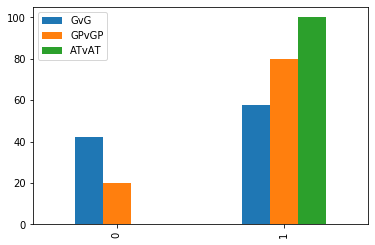

In [390]:
statistic = {"GvG":[minwin,maxwin],"GPvGP":[minwinGP,maxwinGP], "ATvAT":[minwinAT,maxwinAT]}
statisticdf=pd.DataFrame(data=statistic)
statisticdf_T = statisticdf.T
statisticdf=statisticdf.astype(float)

statisticdf.plot(alpha=1,kind='bar')
print("זה משנה איזה אל אתה")
print("זה יותר משנה איזה כוח בחרת")
print("אבל הכי משנה הוא ארכיטיפ שלך")

AxesSubplot(0.125,0.125;0.775x0.755)


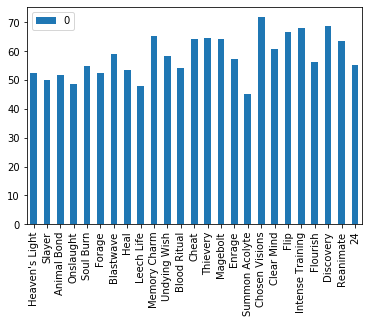

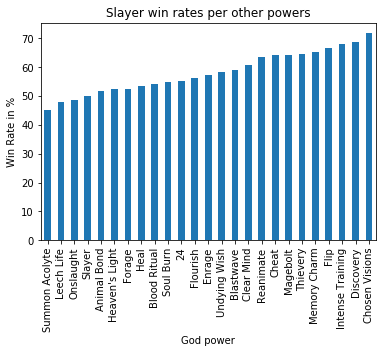

In [391]:
#Here we take God's specific powers and present them on an ascending bar graph against other powers
#GPvGPdf data frame
#God power: slayer
#GPvGPdf['Slayer'].describe()

slayerRow=GPvGPdf.loc['Slayer']
newr=[]
for i in slayerRow:
    if(i!=''):
        newr.append(i.replace('%',''))
    else:
        newr.append('50')

SRDF=pd.DataFrame(newr)
SRDF=SRDF.astype(float)

allpowernames=[]
for i in ColName:
    allpowernames.append(i.get_text())

# words= set( ' '.join(allpowernames).split())
# HelpDfCol= [ { w : int( w in e ) for w in words } for e in allpowernames ]
# GodPNcol=pd.DataFrame(HelpDfCol)
# SRDF=SRDF.rename(columns=HelpCols, errors="raise")


for i in range(0, 24):
    SRDF = SRDF.rename(index={i: allpowernames[i]})
    i=i+1

# SRDF=SRDF.rename(columns={0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1",0:"1"})                            



SalyerVsAllPlot = SRDF.plot(kind='bar')
SalyerVsAllPlot = SRDF.sort_values(by=0,ascending=True).plot(kind='bar',legend=None,title="Slayer win rates per other powers")
SalyerVsAllPlot.set_xlabel("God power")
SalyerVsAllPlot.set_ylabel("Win Rate in %")
print(SalyerVsAllPlot)





GodPower vs Godpower Co-Vars


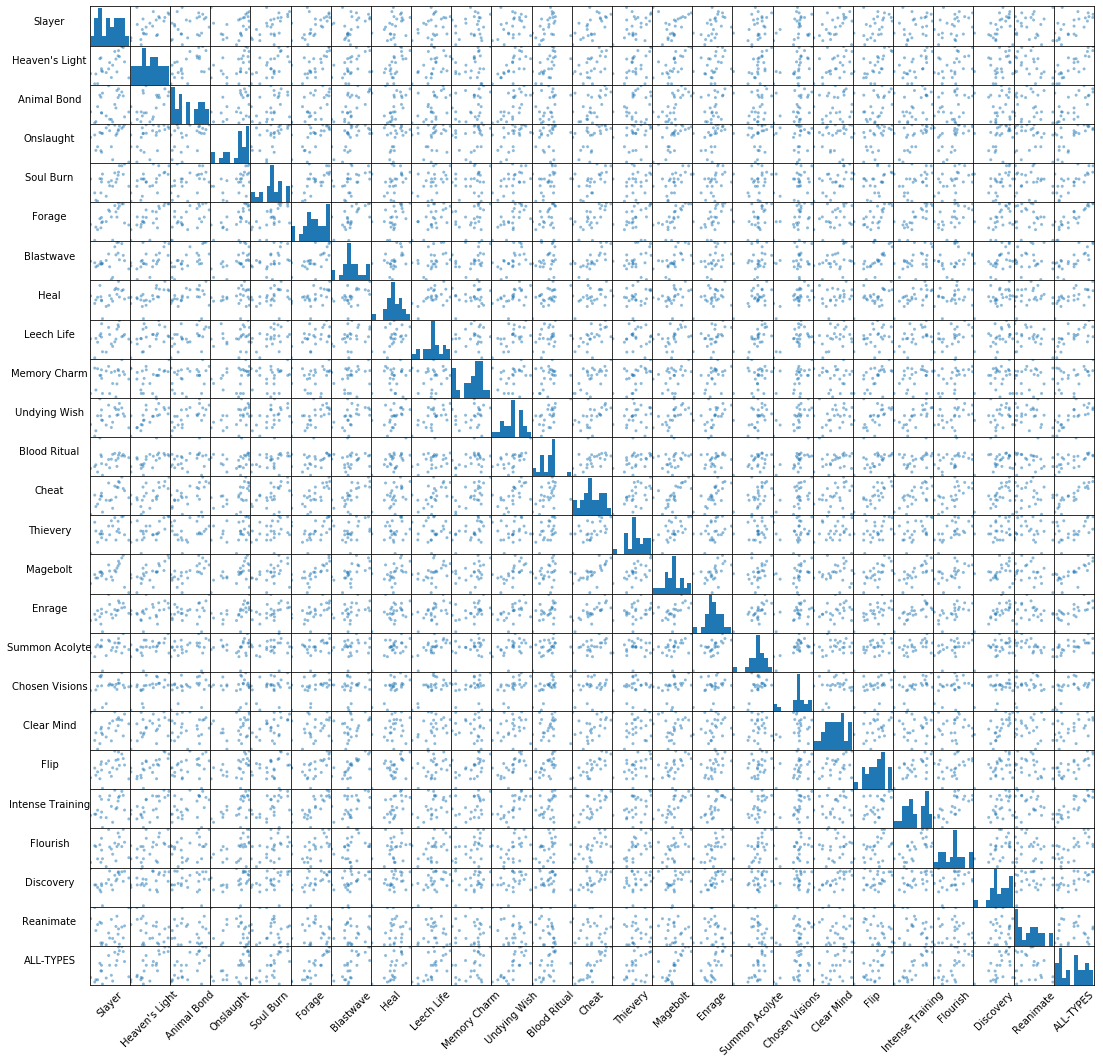

In [305]:
#Shmolik says: Scatter the GPvGPdf dataframe
# pd.plotting.scatter_matrix(GPvGPdf) >> Arange data for that


GPvGPdf = GPvGPdf.replace({'%': ''}, regex=True)
for i in range(0,24):
        GPvGPdf.iloc[i,i]=50
dfGP=GPvGPdf.astype(float)
print('GodPower vs Godpower Co-Vars')
sm = pd.plotting.scatter_matrix(dfGP,figsize=(18,18))


#Set label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#We move the labels because they hid
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]


plt.show()
    

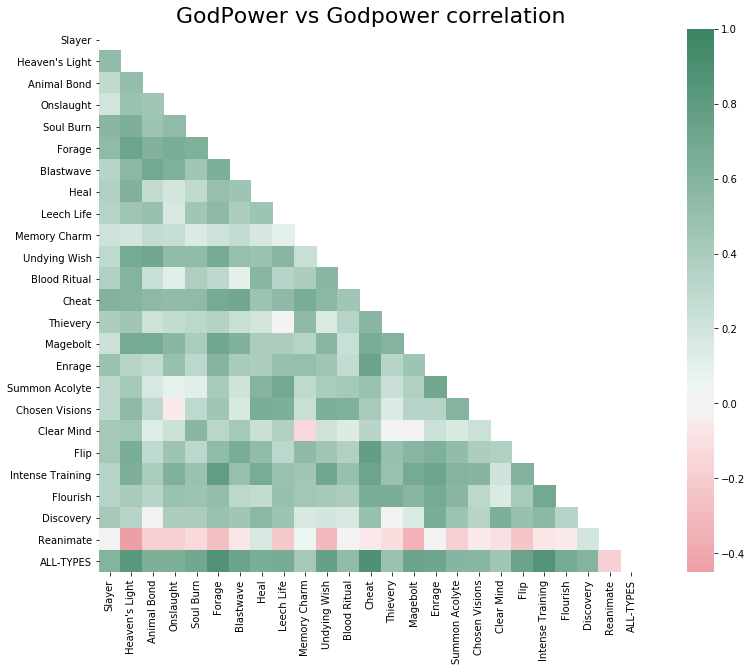

מאוד מעניין! דיסקוברי הוא התואם ביותר לריאנימייט ואלו הכוחות היחדים שמחזרים מן המתים אל המשחק
דיסקוברי מחזיר קסמים ורינימייט מחזיר יצורים, שניהם גוזלים את הנשמה של הקלף בתהליך


In [306]:
#Cool GPvsGPdf correlation pyramid
mask = np.zeros_like(dfGP.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(10,150,as_cmap=True)

plt.figure(figsize=(16,10))
sb.heatmap(dfGP.corr(),cmap=cmap,annot=False,mask = mask,square = True,center =0)
plt.title('GodPower vs Godpower correlation',size=22)
plt.show()
print("מאוד מעניין! דיסקוברי הוא התואם ביותר לריאנימייט ואלו הכוחות היחדים שמחזרים מן המתים אל המשחק")
print("דיסקוברי מחזיר קסמים ורינימייט מחזיר יצורים, שניהם גוזלים את הנשמה של הקלף בתהליך")

In [307]:
# #Help block, we leave it here.
# #cardwinrateARR = [] Moved to lower block

# #url="https://gudecks.com/meta/card-rankings?timeFrame=30&view=gods"
# content = driver.page_source
# soup = bs(content)
# soup

# #Getting infromation from Url
# soup=bs(content,'html.parser')
# cardname = soup.find_all('div',attrs={'class':"card-ranking-name"})
# cardname

[]

שלושה דנדוגרמות ראשונות הן גזורות מנתוני ניצחון של כוחות אלים
תוצאות משתנות בדנדוגרמה הבאה בהרצות נפרדות הנתונים לא חוזים משמעות אקטואלית


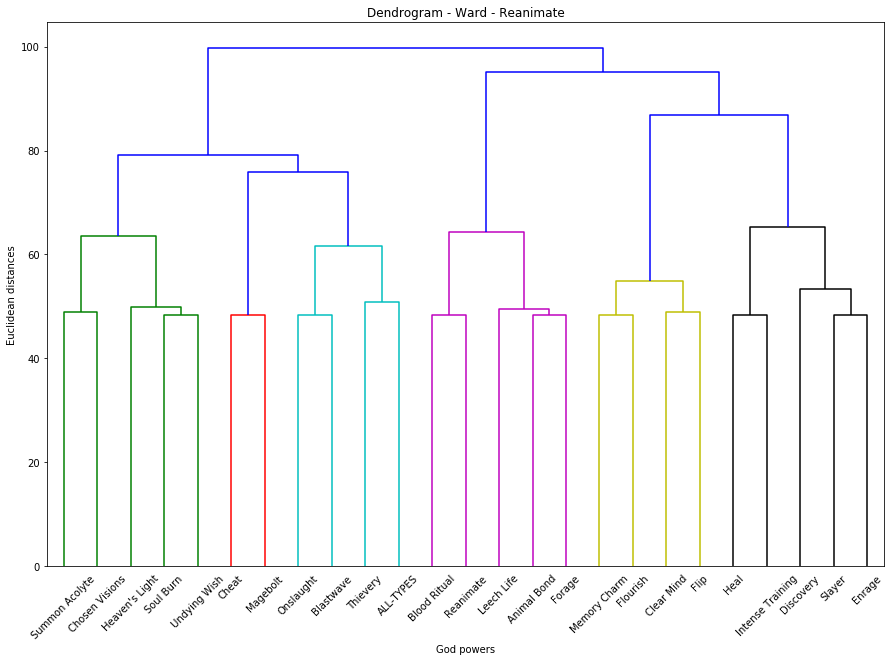

חזיון יםה אך חסר משמעות בעלת ערך לאדם


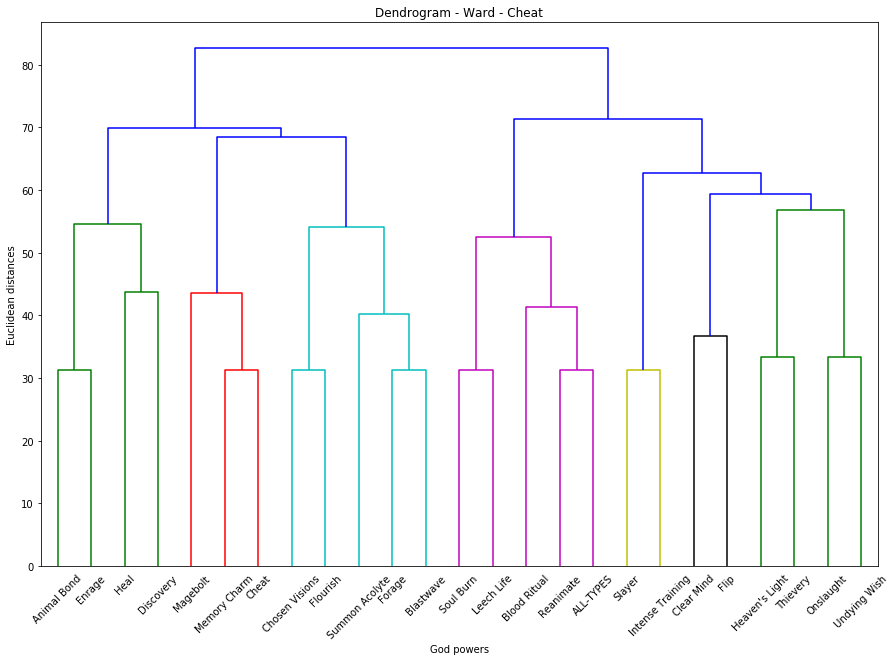

כפי שניתן לראות לא ניתן לחזות בעזרת הטבלה בה השתמשנו מעבר לשכבר נמצא בה, אך כרגיל הנתונים יפים, ובעצם המחשב בנה קשרים גם אם הם חסרי משמעות עבורינו


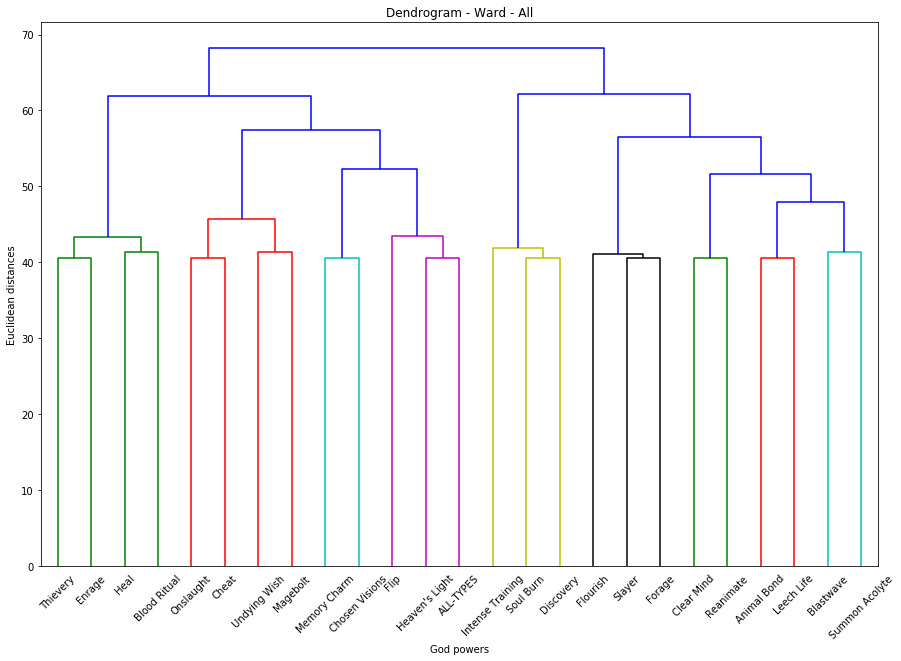

שלושת הדנדוגרמות הבאות הן גזורות מנתוני ניצחון של ארכטייפים
הקשרים שנוצרים מנתונים אלו עושים רושם כחסרי משמעות
GodPower vs Godpower Co-Vars


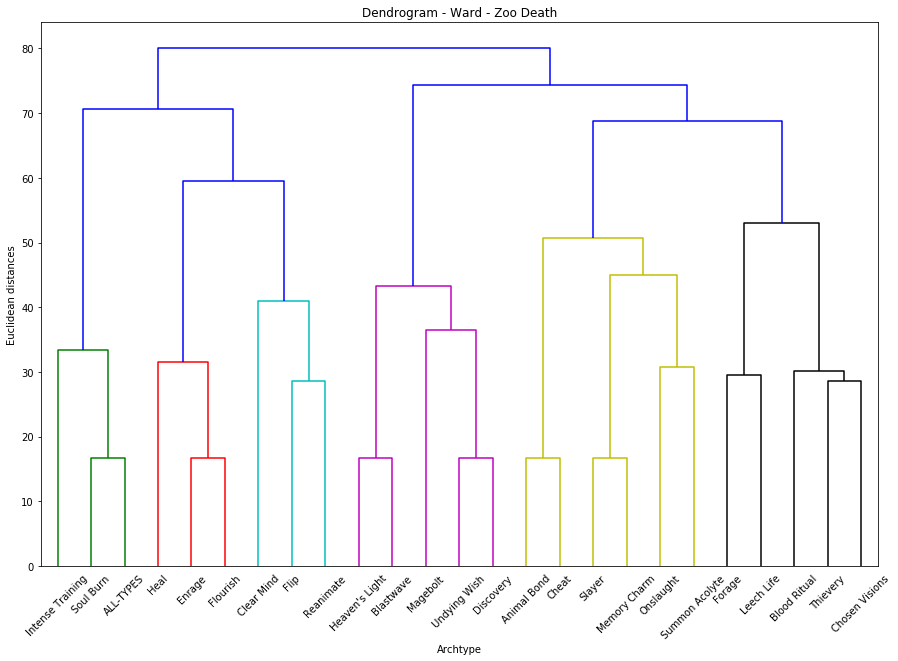

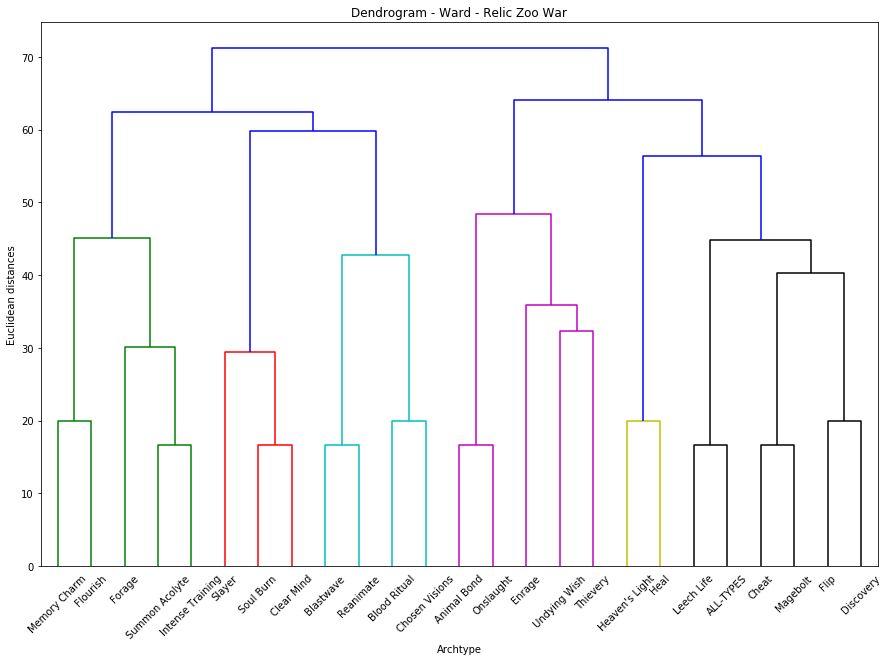

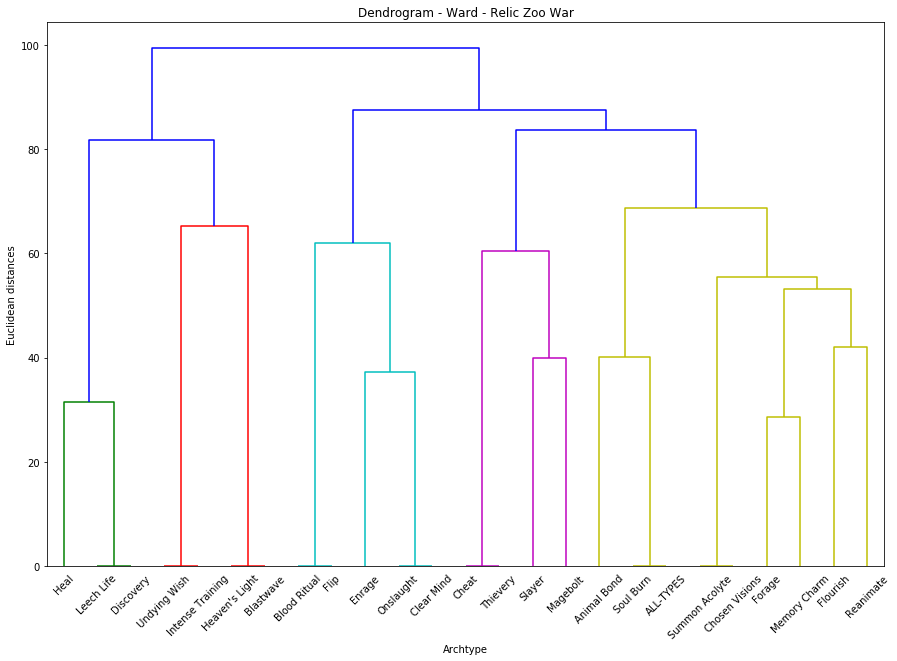

בכדי לקבל נתונים ברורים צריך לאסוף את הדוגמית ביחס לכמות המשחקים כך שבחירת הדוגמית לא תיהיה ראנדומלית ותתן תוצאות שאינן כאותיות


In [414]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale
X = dfGP.Reanimate.sample(300,replace=True).values
Y = dfGP.Cheat.sample(300,replace=True).values
Z = dfGP['ALL-TYPES'].sample(300,replace=True).values

#Rean <> All
print("שלושה דנדוגרמות ראשונות הן גזורות מנתוני ניצחון של כוחות אלים")
print("תוצאות משתנות בדנדוגרמה הבאה בהרצות נפרדות הנתונים לא חוזים משמעות אקטואלית")
plt.figure(figsize=(15,10))
plt.title('Dendrogram - Ward - Reanimate')
plt.xlabel('God powers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=dfGP.columns)
plt.show()

#Cheat <> All
print("חזיון יםה אך חסר משמעות בעלת ערך לאדם")
plt.figure(figsize=(15,10))
plt.title('Dendrogram - Ward - Cheat')
plt.xlabel('God powers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'),labels=dfGP.columns)
plt.show()

#All Types <> All
print("כפי שניתן לראות לא ניתן לחזות בעזרת הטבלה בה השתמשנו מעבר לשכבר נמצא בה, אך כרגיל הנתונים יפים, ובעצם המחשב בנה קשרים גם אם הם חסרי משמעות עבורינו")
plt.figure(figsize=(15,10))
plt.title("Dendrogram - Ward - All")
plt.xlabel('God powers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(Z, method = 'ward'),labels=dfGP.columns)
plt.show()


print("שלושת הדנדוגרמות הבאות הן גזורות מנתוני ניצחון של ארכטייפים")
print("הקשרים שנוצרים מנתונים אלו עושים רושם כחסרי משמעות")

#Make it floaty!
#ATvATdf
fATvATdf=ATvATdf
fATvATdf = fATvATdf.replace({'%': ''}, regex=True)
indexhelper=0
for i in (fATvATdf):
    indexhelper=0
    for j in fATvATdf[i]:
        if(len(j)==0):
            fATvATdf[i][indexhelper]=50.0
        indexhelper=indexhelper+1
fATvATdf=fATvATdf.astype(float)
print('GodPower vs Godpower Co-Vars')

W = fATvATdf['Zoo Death'].sample(300,replace=True).values
plt.figure(figsize=(15,10))
plt.title("Dendrogram - Ward - Zoo Death")
plt.xlabel('Archtype')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(W, method = 'ward'),labels=dfGP.columns)
plt.show()

V = fATvATdf['Relic Zoo War'].sample(300,replace=True).values
plt.figure(figsize=(15,10))
plt.title("Dendrogram - Ward - Relic Zoo War")
plt.xlabel('Archtype')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(V, method = 'ward'),labels=dfGP.columns)
plt.show()

K = fATvATdf['Deck Steal Deception'].sample(300,replace=True).values
plt.figure(figsize=(15,10))
plt.title("Dendrogram - Ward - Relic Zoo War")
plt.xlabel('Archtype')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(K, method = 'ward'),labels=dfGP.columns)
plt.show()

print("בכדי לקבל נתונים ברורים צריך לאסוף את הדוגמית ביחס לכמות המשחקים כך שבחירת הדוגמית לא תיהיה ראנדומלית ותתן תוצאות שאינן כאותיות")


#Minimum variance criterion minimizes the total within-cluster variance.
#Euclidean distances

Vilonce Vs All(3 plots)


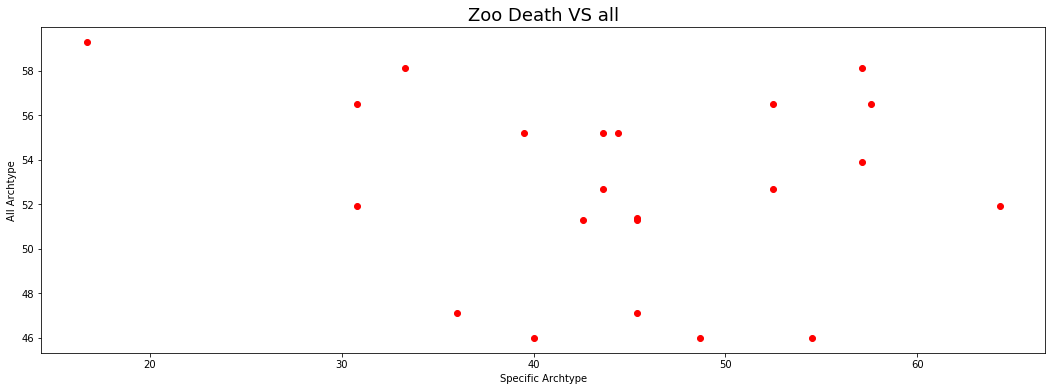

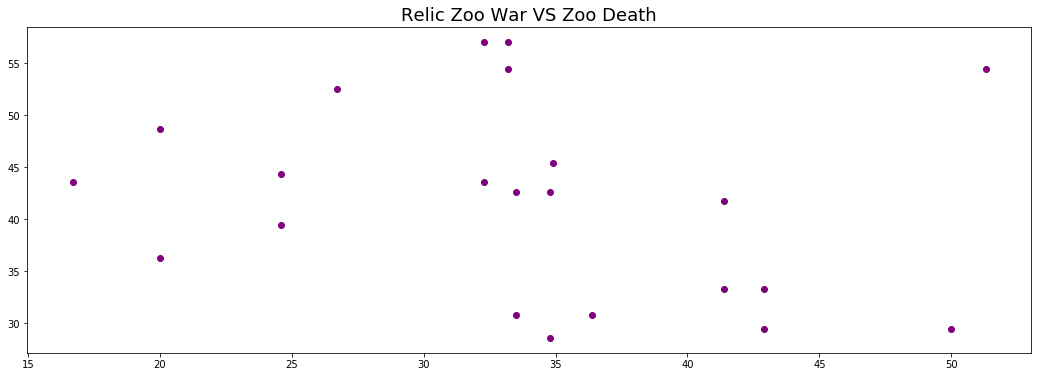

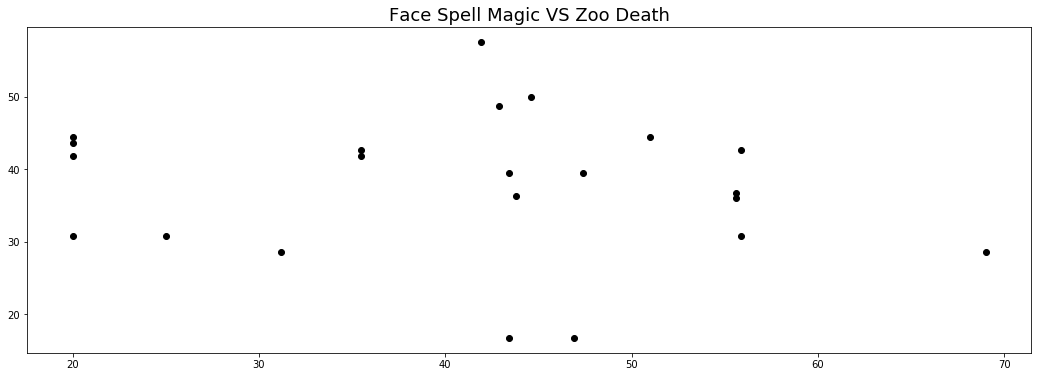

Supptiveness VS Zoo Death(3 plots)


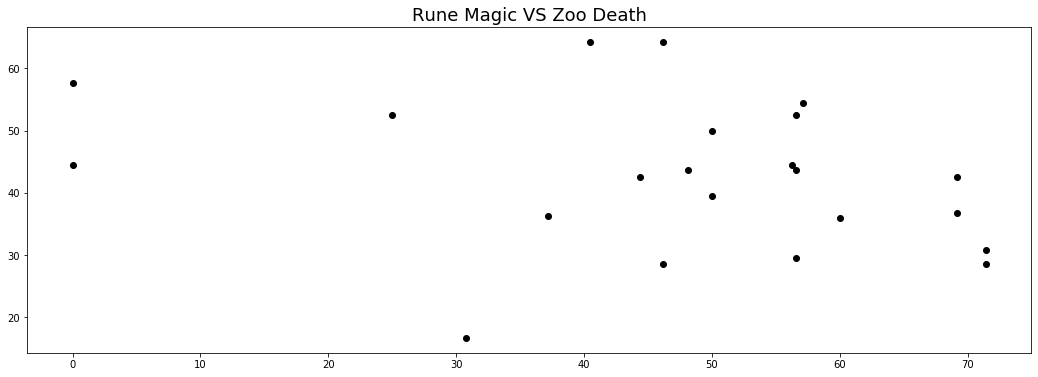

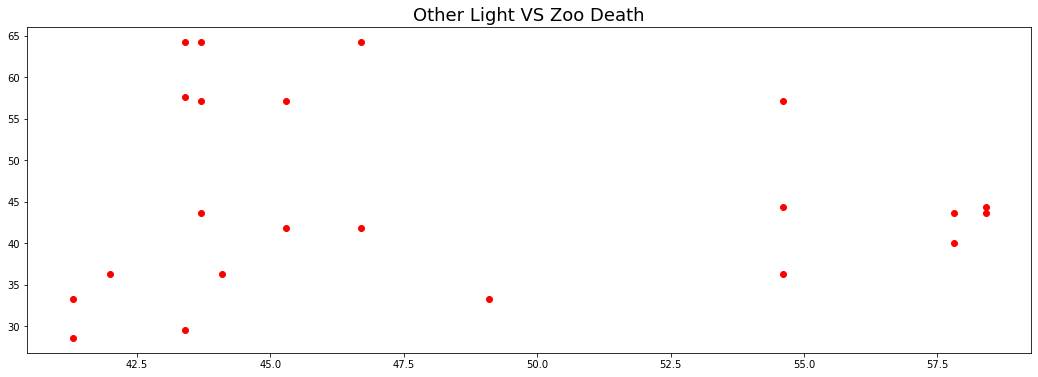

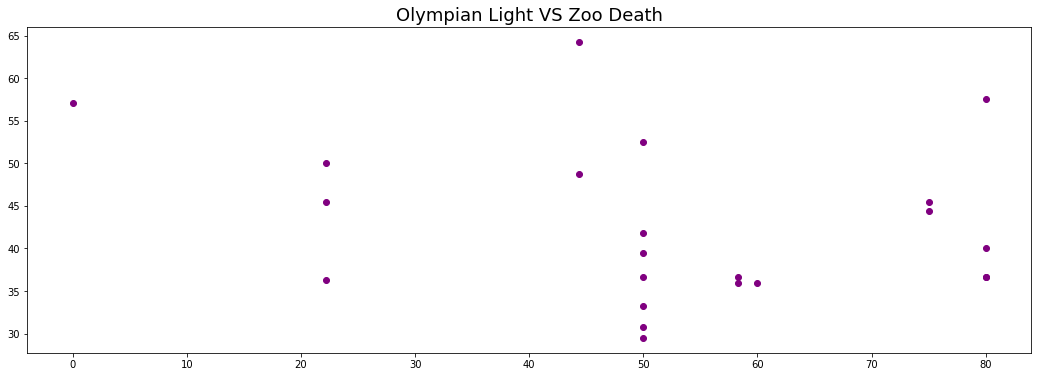

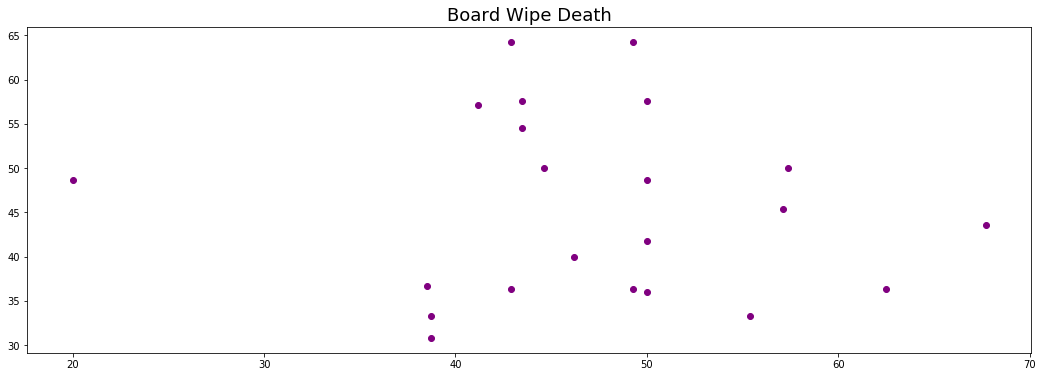

In [462]:
#Arch <> Arch [Coral]
print("Vilonce Vs All(3 plots)")
plt.figure(figsize=(18,6))

plt.xlabel("Specific Archtype",fontsize=10)
plt.ylabel("All Archtype",fontsize=10)

SortedAT=fATvATdf['ALL-TYPES'].sort_values(axis=0)
#Vilonce Vs All
plt.title("Zoo Death VS all",fontsize=18)
SortedF =fATvATdf['Zoo Death'].sort_values(axis=0)
plt.scatter(SortedF.sample(22,replace=True),SortedAT.sample(22,replace=True) , c = 'red')
plt.show()

plt.figure(figsize=(18,6))
plt.title("Relic Zoo War VS Zoo Death",fontsize=18)
SortedF2 =fATvATdf['Relic Zoo War'].sort_values(axis=0)
plt.scatter(SortedF2.sample(22,replace=True),SortedF.sample(22,replace=True), c = 'purple')
plt.show()

plt.figure(figsize=(18,6))
plt.title("Face Spell Magic VS Zoo Death",fontsize=18)
SortedF4 =fATvATdf['Face Spell Magic'].sort_values(axis=0)
plt.scatter(SortedF4.sample(22,replace=True),SortedF.sample(22,replace=True), c = 'black')
plt.show()

#Supptiveness Vs All
print("Supptiveness VS Zoo Death(3 plots)")
plt.figure(figsize=(18,6))
plt.title("Rune Magic VS Zoo Death",fontsize=18)
SortedF5 =fATvATdf['Rune Magic'].sort_values(axis=0)
plt.scatter(SortedF5.sample(22,replace=True),SortedF.sample(22,replace=True), c = 'black')
plt.show()

plt.figure(figsize=(18,6))
plt.title("Other Light VS Zoo Death",fontsize=18)
SortedF6 =fATvATdf['Other Light'].sort_values(axis=0)
plt.scatter(SortedF6.sample(22,replace=True),SortedF.sample(22,replace=True) , c = 'red')
plt.show()

plt.figure(figsize=(18,6))
plt.title("Olympian Light VS Zoo Death",fontsize=18)
SortedF7 =fATvATdf['Olympian Light'].sort_values(axis=0)
plt.scatter(SortedF7.sample(22,replace=True),SortedF.sample(22,replace=True), c = 'purple')
plt.show()

plt.figure(figsize=(18,6))
plt.title("Board Wipe Death",fontsize=18)
SortedF3 =fATvATdf['Board Wipe Death'].sort_values(axis=0)
plt.scatter(SortedF3.sample(22,replace=True),SortedF.sample(22,replace=True), c = 'purple')
plt.show()

#Ressemblance detected! 

In [453]:
#Card wins! (MUST RUN THIS BEFORE RUNNING NEXT BOX EVEN WHEN REUNNING AGAIN!!!!!)
import time 

cardwinrateARR = []
CardNameArr = []

driver.get('https://gudecks.com/meta/card-rankings?timeFrame=30&view=gods');
#url="https://gudecks.com/meta/card-rankings?timeFrame=30&view=gods"

In [454]:
#Card wins!
content = driver.page_source
soup = bs(content)
# soup

#Getting infromation from Url
soup=bs(content,'html.parser')
rshelp=soup.find_all('div',attrs={'class':"card-ranking-name"})
WinRateVates=soup.find_all('div',attrs={'class':"percentage-with-bar"})
# CardNameArr.append(rshelp[0].get_text());

element = driver.find_element_by_class_name("Table__nextPageWrapper")
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
# element.click()

for i in range(0,34): #34 card pages, we could use a "stop sign" but really, more cards are not soon to be released so this is fine.
    for j,Name in enumerate(rshelp):
        CardNameArr.append(rshelp[j].get_text());
        cardwinrateARR.append(WinRateVates[j*2].get_text()); #WRV is taking too much info for it is under same div name, we only want evens.
    element.click()
    rshelp.clear()
    WinRateVate.clear()
#   time.sleep(1)
    content = driver.page_source
    soup = bs(content)
    rshelp=soup.find_all('div',attrs={'class':"card-ranking-name"})
    WinRateVates=soup.find_all('div',attrs={'class':"percentage-with-bar"})
# print(CardNameArr)
# print(cardwinrateARR)


Sorted bar plot of card win rates


<function matplotlib.pyplot.show(*args, **kw)>

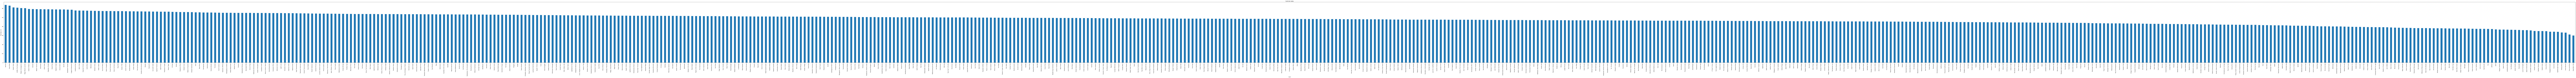

In [455]:
CardWinFloats=[]
np.mat(CardWinFloats)
for i,r in enumerate(cardwinrateARR):
     CardWinFloats.append(r.replace('%',''))
CardWinFloats
CardWinDF = pd.DataFrame(CardWinFloats, index=CardNameArr)
CardWinDF = CardWinDF.astype(float)

CardWinSort = CardWinDF.sort_values(by=0,ascending=False).plot(kind='bar',legend=None,title="Card win rates",figsize=(500,12))
CardWinSort.set_xlabel("Card")
CardWinSort.set_ylabel("Win Rate in %")
print("Sorted bar plot of card win rates")
plt.show


In [456]:
#Get best wining card picture!
print("Highest winrate card: "+CardNameArr[0])
print("Win rate:: "+cardwinrateARR[0])
url="https://godsunchained.com/learn/cards"
driver.get(url);
#First search for the card like a boss!
#content = driver.page_source
# soup = bs(content)

Highest winrate card: Half Life
Win rate:: 63.8%


In [457]:
#Getting winner's image WARNING: PAGE LOADS SLOWLY AND "LIES" THAT IT WAS "LOADED" be patient
SearchBox = driver.find_element_by_xpath("/html/body/cerberus-website-root/div/app-cards/div/app-card-list/div[1]/div[2]/input")
#XPath /html/body/cerberus-website-root/div/app-cards/div/app-card-list/div[1]/div[2]/input
SearchBox.send_keys(CardNameArr[0])
# cssSelctor=".deck-card > app-card:nth-child(1) > composited-card:nth-child(1)"
cssSelector=".cards-section"
Img = driver.find_element_by_css_selector(cssSelector)


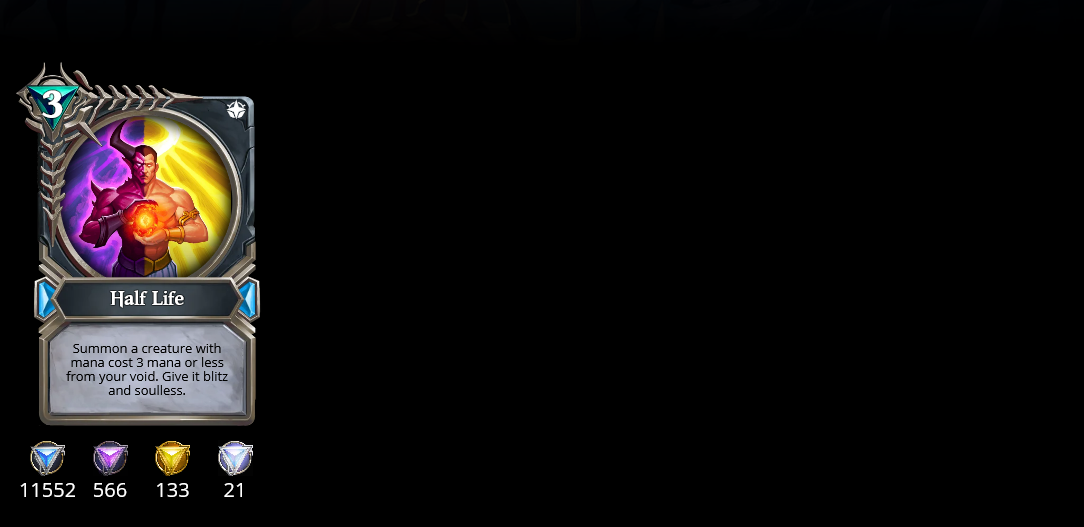

In [458]:
from PIL import Image
Img.screenshot('winner.png')
img_PIL = Image.open(r'winner.png')
display(img_PIL)
#We screenshoted the whole card section because selenium claims any inner element of the section is "stale". Tried for an hour and a half to solve that...

In [517]:
#Imaginary cobination win rate!

#Make Floaty!
FGPvGPdf=GPvGPdf
FGPvGPdf = FGPvGPdf.replace({'%': ''}, regex=True)
indexhelper=0
for i in (FGPvGPdf):
    indexhelper=0
    for j in FGPvGPdf[i]:
        if(len(j)==0):
            FGPvGPdf[i][indexhelper]=50.0
        indexhelper=indexhelper+1
FGPvGPdf=FGPvGPdf.astype(float)

#Imaginary cobination win rate! treating as unrelated event #We can loop this too to get all values
Choose_God_Power1="Heaven's Light"
Choose_God_Power2="Animal Bond"
Choose_Card1="Grass Roots"
Choose_Card2="Half Life"

cWin1=CardWinDF.loc[Choose_Card1][0]/100
cWin2=CardWinDF.loc[Choose_Card2][0]/100
C1Victory=(cWin2/cWin1)/2
PowerStatus = FGPvGPdf[Choose_God_Power1][Choose_God_Power2]
PowerStatus = PowerStatus/100
WinRate=(C1Victory+PowerStatus)/2
print("Probability of wining with " +Choose_God_Power1+ "against " +Choose_God_Power2)
print("Give that player one has card: " +Choose_Card1+ "against Player 2's" +Choose_Card2)
print("Is: "+ str(WinRate))


Probability of wining with Heaven's Lightagainst Animal Bond
Give that player one has card: Grass Rootsagainst Player 2'sHalf Life
Is: 0.48617460317460315


0.48617460317460315